In [1]:
from idanalysis.idsdata import IVU18Data
from idanalysis.idsmodels import IVU18
from idanalysis.analysis import TrajectoryAnalysis

from scipy.integrate import cumulative_trapezoid as cumtrapz
import numpy as np
import matplotlib.pyplot as plt

# Generate kickmaps

In [2]:
ivu = IVU18()
ivu.generate_radia_model(nr_periods=5, gap=4.3, solve=True)

In [3]:
z = np.linspace(-200, 200, 2001)
field = ivu.model.get_field(0, 0, z)

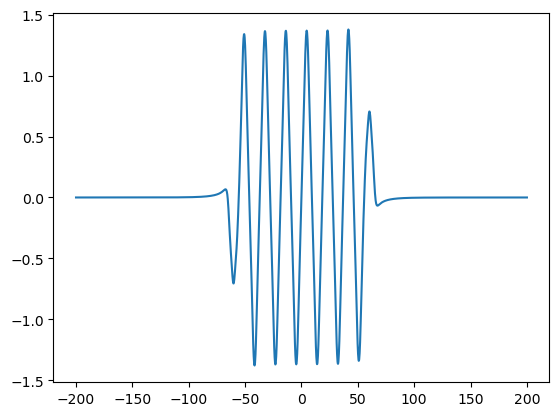

In [4]:
plt.plot(z, field[:, 1])

RADIA model setted as fieldsource
Calculating trajectory...


Text(0, 0.5, 'rx [um]')

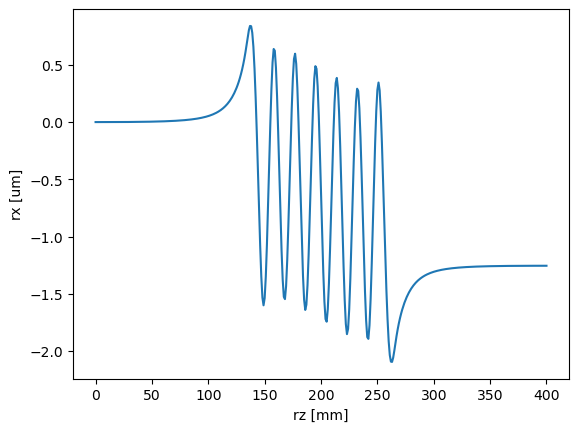

In [5]:
traj_anl = TrajectoryAnalysis(ivu.model)
traj_anl.rk_s_step = 1
traj_anl.set_traj_configs()

traj_anl.traj_init_rx = 0
traj_anl.traj_init_ry = 0
traj_anl.traj_init_px = 0
traj_anl.traj_init_py = 0
traj_anl.traj_init_rz = -200
traj_anl.traj_max_rz = 200

traj_anl.calculate_traj()
plt.plot(traj_anl.traj.s, 1e3*traj_anl.traj.rx)
plt.xlabel('rz [mm]')
plt.ylabel('rx [um]')

In [18]:
gridx = 1e-3*np.linspace(-4, 4, 3)
gridy = 1e-3*np.linspace(-1.5, 1.5, 3)
traj_anl.kmap_fname = 'test'
traj_anl.kmap_idlen = 2
traj_anl.generate_kickmap(gridx, gridy)

rx = -4.0 mm, ry = -1.5: px = -0.0 urad, py = 0.5 urad
rx = 0.0 mm, ry = -1.5: px = 0.0 urad, py = 0.5 urad
rx = 4.0 mm, ry = -1.5: px = 0.0 urad, py = 0.5 urad
rx = -4.0 mm, ry = 0.0: px = -0.0 urad, py = 0.0 urad
rx = 0.0 mm, ry = 0.0: px = 0.0 urad, py = 0.0 urad
rx = 4.0 mm, ry = 0.0: px = 0.0 urad, py = 0.0 urad
rx = -4.0 mm, ry = 1.5: px = -0.0 urad, py = -0.5 urad
rx = 0.0 mm, ry = 1.5: px = 0.0 urad, py = -0.5 urad
rx = 4.0 mm, ry = 1.5: px = 0.0 urad, py = -0.5 urad


In [6]:
gridx = 1e-3*np.linspace(-4, 4, 9)
gridy = 1e-3*np.linspace(-2, 2, 9)
gaps = np.array([4.3, 5, 6, 7, 8, 9, 10, 12, 15, 20, 24])
ivudata = IVU18Data()
ivu = IVU18()

for i, gap in enumerate(gaps):
    print('gap: {:.1f}'.format(gap))
    print()
    ivu.generate_radia_model(nr_periods=5, gap=gap, solve=True)

    traj_anl = TrajectoryAnalysis(ivu.model)
    traj_anl.rk_s_step = 1
    traj_anl.set_traj_configs()

    traj_anl.traj_init_rx = 0
    traj_anl.traj_init_ry = 0
    traj_anl.traj_init_px = 0
    traj_anl.traj_init_py = 0
    traj_anl.traj_init_rz = -200
    traj_anl.traj_max_rz = 200
    traj_anl.kmap_idlen = 2
    traj_anl.set_traj_configs()
    ffname = ivudata.get_kickmap_filename(gap=gap)
    fname = ffname.split('/')[-1]
    traj_anl.kmap_fname = fname

    traj_anl.generate_kickmap(gridx, gridy)

gap: 4.3

RADIA model setted as fieldsource
RADIA model setted as fieldsource
rx = -4.0 mm, ry = -2.0: px = 0.3 urad, py = 2.7 urad
rx = -3.0 mm, ry = -2.0: px = 0.1 urad, py = 2.5 urad
rx = -2.0 mm, ry = -2.0: px = 0.0 urad, py = 2.5 urad
rx = -1.0 mm, ry = -2.0: px = -0.1 urad, py = 2.5 urad
rx = 0.0 mm, ry = -2.0: px = 0.0 urad, py = 3.2 urad
rx = 1.0 mm, ry = -2.0: px = 0.1 urad, py = 2.5 urad
rx = 2.0 mm, ry = -2.0: px = 0.0 urad, py = 2.5 urad
rx = 3.0 mm, ry = -2.0: px = -0.0 urad, py = 2.5 urad
rx = 4.0 mm, ry = -2.0: px = -0.3 urad, py = 2.7 urad
rx = -4.0 mm, ry = -1.5: px = 0.0 urad, py = 1.7 urad
rx = -3.0 mm, ry = -1.5: px = 0.0 urad, py = 1.6 urad
rx = -2.0 mm, ry = -1.5: px = -0.0 urad, py = 1.6 urad
rx = -1.0 mm, ry = -1.5: px = -0.0 urad, py = 1.6 urad
rx = 0.0 mm, ry = -1.5: px = -0.0 urad, py = 1.7 urad
rx = 1.0 mm, ry = -1.5: px = 0.0 urad, py = 1.6 urad
rx = 2.0 mm, ry = -1.5: px = 0.0 urad, py = 1.6 urad
rx = 3.0 mm, ry = -1.5: px = -0.0 urad, py = 1.6 urad
rx = 4